In [15]:
import protocols 
from matplotlib import pyplot as plt
from setting import Setting

setting = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=110550070)
print('aloha')
result = protocols.aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('slotted_aloha')
result = protocols.slotted_aloha(setting, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma')
result = protocols.csma(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

print('csma_cd')
result = protocols.csma_cd(setting, 0, True)
print('success_rate:', result[0])
print('idle_rate:', result[1])
print('collision_rate:', result[2])

aloha
            V                                     V                V    V                               
h0: ........<---|...<--->.........................<---|...................<---|<---|.........<---|......
           V                          V             V    V                                              
h1: .......<---|..................<---><--->........<---|.....<---><--->................................
                                                         V                  V                V V        
h2: .....................................................<--->..............<---|<---|....<---|..<---|..
success_rate: 0.3
idle_rate: 0.33
collision_rate: 0.37
slotted_aloha
            V                                     V                V    V                               
h0: ..........<---|.....<--->.........................<---|<---|<---|..........<---|.....<---><---|.....
           V                          V             V    V                           

In [16]:
# Q2
success_rate_list = [[],[],[],[]] # order: aloha, slotted_aloha, csma, csma_cd
idle_rate_list = [[],[],[],[]]
collision_rate_list = [[],[],[],[]]
co = [0, 1, 2, 3]
p_size = [7, 5, 3, 1]
n = 10
for c, p in zip(co, p_size):
    success_rate = [0,0,0,0]
    idle_rate = [0,0,0,0]
    collision_rate = [0,0,0,0]
    for s in range(n):
        problem = Setting(link_delay=c, packet_size=p)
        # aloha
        result = protocols.aloha(problem)
        success_rate[0] += result[0]
        idle_rate[0] += result[1]
        collision_rate[0] += result[2]
        # slotted_aloha
        result = protocols.slotted_aloha(problem)
        success_rate[1] += result[0]
        idle_rate[1] += result[1]
        collision_rate[1] += result[2]
        # csma
        result = protocols.csma(problem)
        success_rate[2] += result[0]
        idle_rate[2] += result[1]
        collision_rate[2] += result[2]
        # csma_cd
        result = protocols.csma_cd(problem)
        success_rate[3] += result[0]
        idle_rate[3] += result[1]
        collision_rate[3] += result[2]
    
    for i in range(4):
        success_rate_list[i].append(success_rate[i]/n)
        idle_rate_list[i].append(idle_rate[i]/n)
        collision_rate_list[i].append(collision_rate[i]/n)

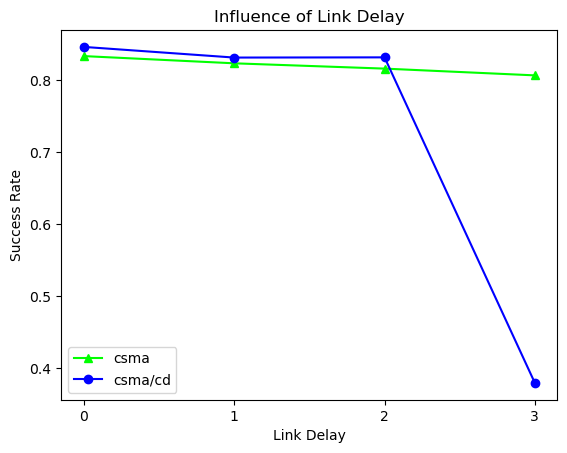

In [17]:
plt.plot(co, success_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(co, success_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Success Rate')
plt.xticks(co)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()

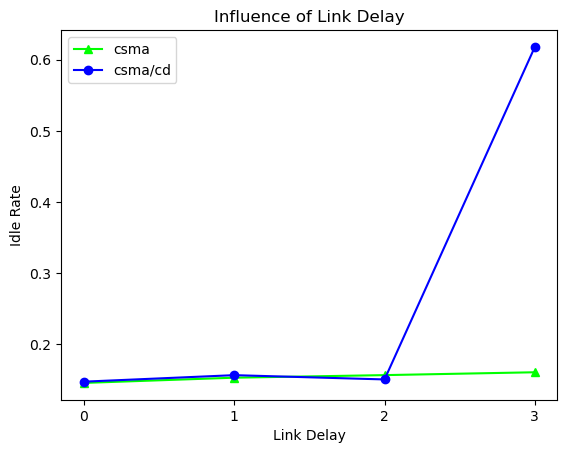

In [18]:
plt.plot(co, idle_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(co, idle_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Idle Rate')
plt.xticks(co)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()

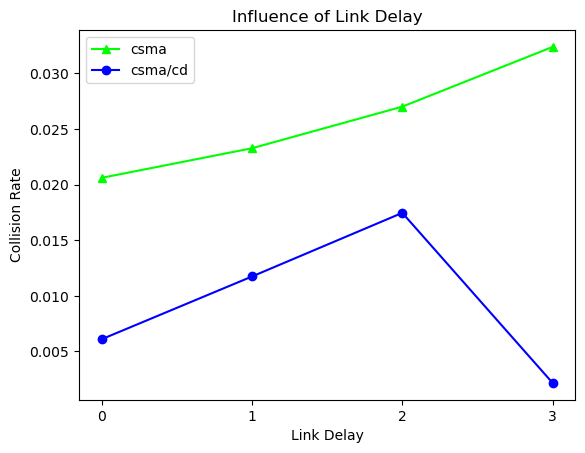

In [19]:
plt.plot(co, collision_rate_list[2], marker='^', label='csma', color='#00ff00')
plt.plot(co, collision_rate_list[3], marker='o', label='csma/cd', color='#0000ff')
plt.xlabel('Link Delay')
plt.ylabel('Collision Rate')
plt.xticks(co)
plt.title('Influence of Link Delay')
plt.legend()
plt.show()